In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#from sklearn.metrics import classification_repo
#rt, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('google_reviews5.csv')
df.head()

query                   name  \
0  restaurant, dublin  FIRE Steakhouse & Bar   
1  restaurant, dublin  FIRE Steakhouse & Bar   
2  restaurant, dublin  FIRE Steakhouse & Bar   
3  restaurant, dublin  FIRE Steakhouse & Bar   
4  restaurant, dublin  FIRE Steakhouse & Bar   

                               google_id                     place_id  \
0  0x48670e9baf2ed897:0xa78bc9f5604e6175  ChIJl9gur5sOZ0gRdWFOYPXJi6c   
1  0x48670e9baf2ed897:0xa78bc9f5604e6175  ChIJl9gur5sOZ0gRdWFOYPXJi6c   
2  0x48670e9baf2ed897:0xa78bc9f5604e6175  ChIJl9gur5sOZ0gRdWFOYPXJi6c   
3  0x48670e9baf2ed897:0xa78bc9f5604e6175  ChIJl9gur5sOZ0gRdWFOYPXJi6c   
4  0x48670e9baf2ed897:0xa78bc9f5604e6175  ChIJl9gur5sOZ0gRdWFOYPXJi6c   

                                       location_link  \
0  https://www.google.com/maps/place/FIRE+Steakho...   
1  https://www.google.com/maps/place/FIRE+Steakho...   
2  https://www.google.com/maps/place/FIRE+Steakho...   
3  https://www.google.com/maps/place/FIRE+Steakho...   
4  https://www.google.com/maps/place/FIRE+Steakho...   

                                        reviews_link  \
0  https://search.google.com/local/reviews?placei...   
1  https://search.google.com/local/reviews?placei...   
2  https://search.google.com/local/reviews?placei...   
3  https://search.google.com/local/reviews?placei...   
4  https://search.google.com/local/reviews?placei...   

                                   reviews_per_score  reviews  rating  \
0  {"1": 95, "2": 101, "3": 250, "4": 656, "5": 1...     2951     4.4   
1  {"1": 95, "2": 101, "3": 250, "4": 656, "5": 1...     2951     4.4   
2  {"1": 95, "2": 101, "3": 250, "4": 656, "5": 1...     2951     4.4   
3  {"1": 95, "2": 101, "3": 250, "4": 656, "5": 1...     2951     4.4   
4  {"1": 95, "2": 101, "3": 250, "4": 656, "5": 1...     2951     4.4   

                              review_id  ...  \
0   ChZDSUhNMG9nS0VJQ0FnSURScjhhVlNBEAE  ...   
1  ChdDSUhNMG9nS0VJQ0FnSUNKdnJLY3RnRRAB  ...   
2   ChZDSUhNMG9nS0VJQ0FnSURoczRuWU1BEAE  ...   
3  ChdDSUhNMG9nS0VJQ0FnSUNKLXNhMnpRRRAB  ...   
4  ChdDSUhNMG9nS0VJQ0FnSUR4OGFfVTNnRRAB  ...   

                                     review_img_urls owner_answer  \
0  https://lh5.googleusercontent.com/p/AF1QipMWTU...          NaN   
1  https://lh5.googleusercontent.com/p/AF1QipMcUy...          NaN   
2  https://lh5.googleusercontent.com/p/AF1QipMrQg...          NaN   
3  https://lh5.googleusercontent.com/p/AF1QipOCqJ...          NaN   
4  https://lh5.googleusercontent.com/p/AF1QipP7KU...          NaN   

   owner_answer_timestamp owner_answer_timestamp_datetime_utc  \
0                     NaN                                 NaN   
1                     NaN                                 NaN   
2                     NaN                                 NaN   
3                     NaN                                 NaN   
4                     NaN                                 NaN   

                                         review_link review_rating  \
0  https://www.google.com/maps/reviews/data=!4m8!...           5.0   
1  https://www.google.com/maps/reviews/data=!4m8!...           5.0   
2  https://www.google.com/maps/reviews/data=!4m8!...           5.0   
3  https://www.google.com/maps/reviews/data=!4m8!...           5.0   
4  https://www.google.com/maps/reviews/data=!4m8!...           5.0   

  review_timestamp  review_datetime_utc  review_likes    reviews_id  
0     1.683401e+09     05/06/2023 19:20           0.0 -6.370000e+18  
1     1.687931e+09  06/28/2023 05:41:44           1.0 -6.370000e+18  
2     1.679049e+09  03/17/2023 10:27:11           1.0 -6.370000e+18  
3     1.687723e+09  06/25/2023 19:54:18           0.0 -6.370000e+18  
4     1.686415e+09     06/10/2023 16:43           0.0 -6.370000e+18  

[5 rows x 26 columns]

In [40]:
df.shape

(1328, 26)

In [3]:
# List of column names to drop
columns_to_drop = ['query','google_id', 'location_link', 'reviews_link','reviews_per_score', 'review_id',
                  'review_img_urls','author_image', 'owner_answer_timestamp','owner_answer_timestamp_datetime_utc',
                   'review_datetime_utc','author_title','review_img_url','author_link','review_timestamp']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
df.head()

name                     place_id  reviews  rating  \
0  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
4  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   

      author_id                                        review_text  \
0  1.010000e+20  This place is absolutely outstanding. It was a...   
1  1.110000e+20  Excellent dinner experience in the city center...   
2  1.150000e+20  Outstanding from start to finish!\n\nEnjoyed a...   
3  1.070000e+20  Called in on a Saturday without a booking with...   
4  1.070000e+20  We went today for lunch, food was amazing! The...   

  owner_answer                                        review_link  \
0          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
1          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
2          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
3          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
4          NaN  https://www.google.com/maps/reviews/data=!4m8!...   

   review_rating  review_likes    reviews_id  
0            5.0           0.0 -6.370000e+18  
1            5.0           1.0 -6.370000e+18  
2            5.0           1.0 -6.370000e+18  
3            5.0           0.0 -6.370000e+18  
4            5.0           0.0 -6.370000e+18

In [4]:
#EDA-Exploratory data analysis
print (df['rating'].unique())

[4.4 4.1 4.2 3.9 4.5 4.6 4.3 4.7 4.8 3.  3.5 3.8 3.2 3.1 2.9 2.8 3.3 3.4
 3.6 3.7 4.9]


In [5]:
#EDA
df.isnull().sum()

name                0
place_id            0
reviews             0
rating              0
author_id           0
review_text         0
owner_answer     1146
review_link         1
review_rating       1
review_likes        1
reviews_id          1
dtype: int64

In [4]:
df['review_text']. dropna() #need to deal with missing data-delete rows?, justify. empty reviews dropped, not useful to dataset

0       This place is absolutely outstanding. It was a...
1       Excellent dinner experience in the city center...
2       Outstanding from start to finish!\n\nEnjoyed a...
3       Called in on a Saturday without a booking with...
4       We went today for lunch, food was amazing! The...
                              ...                        
1323    Probably the best vegan burger I've ever had. ...
1324    Cozy little restaurant with really tasty food....
1325    Very cosy, intimate restaurant. Lovely staff, ...
1326    So many mussels, and for cheap too! They were ...
1327    Portions are huge and their prices are so good...
Name: review_text, Length: 1328, dtype: object

In [34]:
df=df.dropna(subset=['review_text'])

In [35]:
df.isnull().sum()

name                0
place_id            0
reviews             0
rating              0
author_id           0
review_text         0
owner_answer     1146
review_link         1
review_rating       1
review_likes        1
reviews_id          1
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1328 non-null   object 
 1   place_id       1328 non-null   object 
 2   reviews        1328 non-null   int64  
 3   rating         1328 non-null   float64
 4   author_id      1328 non-null   float64
 5   review_text    1328 non-null   object 
 6   owner_answer   182 non-null    object 
 7   review_link    1327 non-null   object 
 8   review_rating  1327 non-null   float64
 9   review_likes   1327 non-null   float64
 10  reviews_id     1327 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 114.2+ KB


In [37]:
df.describe()

reviews       rating     author_id  review_rating  review_likes  \
count   1328.000000  1328.000000  1.328000e+03    1327.000000   1327.000000   
mean    2264.518072     4.297063  1.092954e+20       4.240392      0.666918   
std     2307.248006     0.417116  5.448076e+18       1.143648      1.392930   
min      239.000000     2.800000  1.000000e+20       1.000000      0.000000   
25%     1234.000000     4.100000  1.043395e+20       4.000000      0.000000   
50%     1702.000000     4.400000  1.093930e+20       5.000000      0.000000   
75%     2951.000000     4.600000  1.140000e+20       5.000000      1.000000   
max    12985.000000     4.900000  1.183530e+20       5.000000     17.000000   

         reviews_id  
count  1.327000e+03  
mean  -2.748993e+17  
std    5.586682e+18  
min   -9.130000e+18  
25%   -6.580000e+18  
50%    7.090000e+17  
75%    5.000000e+18  
max    8.980000e+18

In [38]:
df.shape

(1328, 11)

In [39]:
df.describe().T.drop("count",axis=1) #Summary Statistics

mean           std           min           25%  \
reviews        2.264518e+03  2.307248e+03  2.390000e+02  1.234000e+03   
rating         4.297063e+00  4.171155e-01  2.800000e+00  4.100000e+00   
author_id      1.092954e+20  5.448076e+18  1.000000e+20  1.043395e+20   
review_rating  4.240392e+00  1.143648e+00  1.000000e+00  4.000000e+00   
review_likes   6.669179e-01  1.392930e+00  0.000000e+00  0.000000e+00   
reviews_id    -2.748993e+17  5.586682e+18 -9.130000e+18 -6.580000e+18   

                        50%           75%           max  
reviews        1.702000e+03  2.951000e+03  1.298500e+04  
rating         4.400000e+00  4.600000e+00  4.900000e+00  
author_id      1.093930e+20  1.140000e+20  1.183530e+20  
review_rating  5.000000e+00  5.000000e+00  5.000000e+00  
review_likes   0.000000e+00  1.000000e+00  1.700000e+01  
reviews_id     7.090000e+17  5.000000e+18  8.980000e+18

In [6]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['vadar compound']].sort_values(by='vadar compound', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with vadar compound', fontdict={'fontsize':18}, pad=16);

KeyError: "None of [Index(['vadar compound'], dtype='object')] are in the [columns]"

<Figure size 800x1200 with 0 Axes>

In [41]:
df['review_likes'].value_counts()

0.0     860
1.0     281
2.0      95
3.0      38
4.0      24
5.0      12
6.0       8
7.0       5
17.0      2
13.0      1
14.0      1
Name: review_likes, dtype: int64

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['review_likes']].sort_values(by='review_likes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Features Correlating with review_likes', fontdict={'fontsize':18}, pad=16);

In [ ]:
df['rating'].value_counts()

Text(0, 0.5, 'Density')

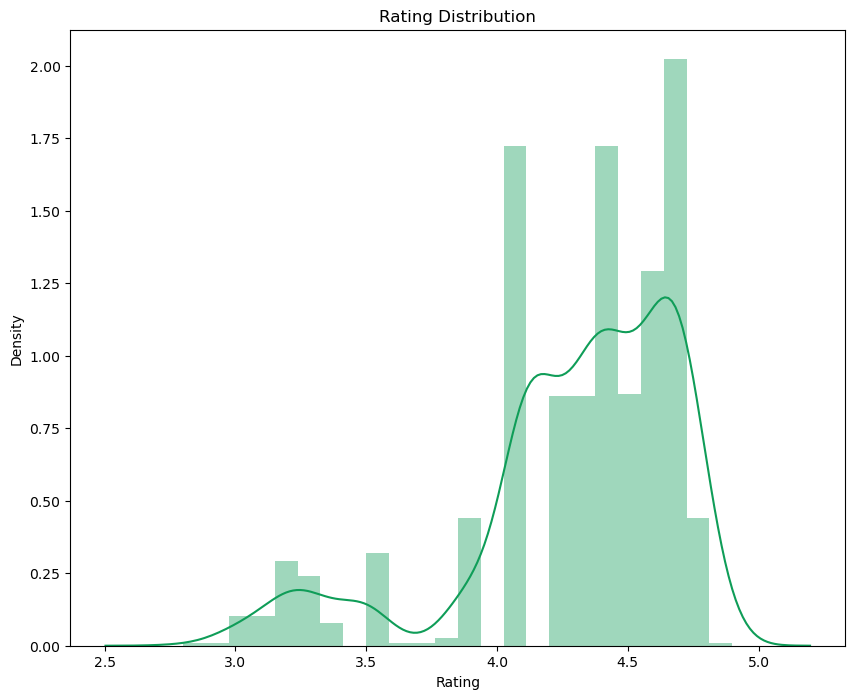

In [61]:
fig = plt.figure(figsize=(10, 8))# rating distribution with google green colour
sns.distplot(df["rating"], color = '#0F9D58')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')

In [ ]:
df.review_text.astype(str)

In [ ]:
#pip install WordCloud

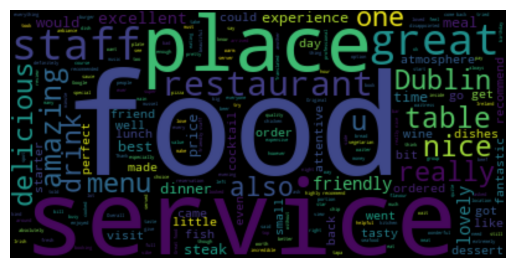

In [7]:
#Creating Stopwords list
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords=set(stopwords.words('english'))
stopwords.update(["br","href", "good",'Translated' 'by' 'Google','of','the','is'])
textt = " ".join(review for review in df.review_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)


plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()

<Figure size 800x800 with 0 Axes>

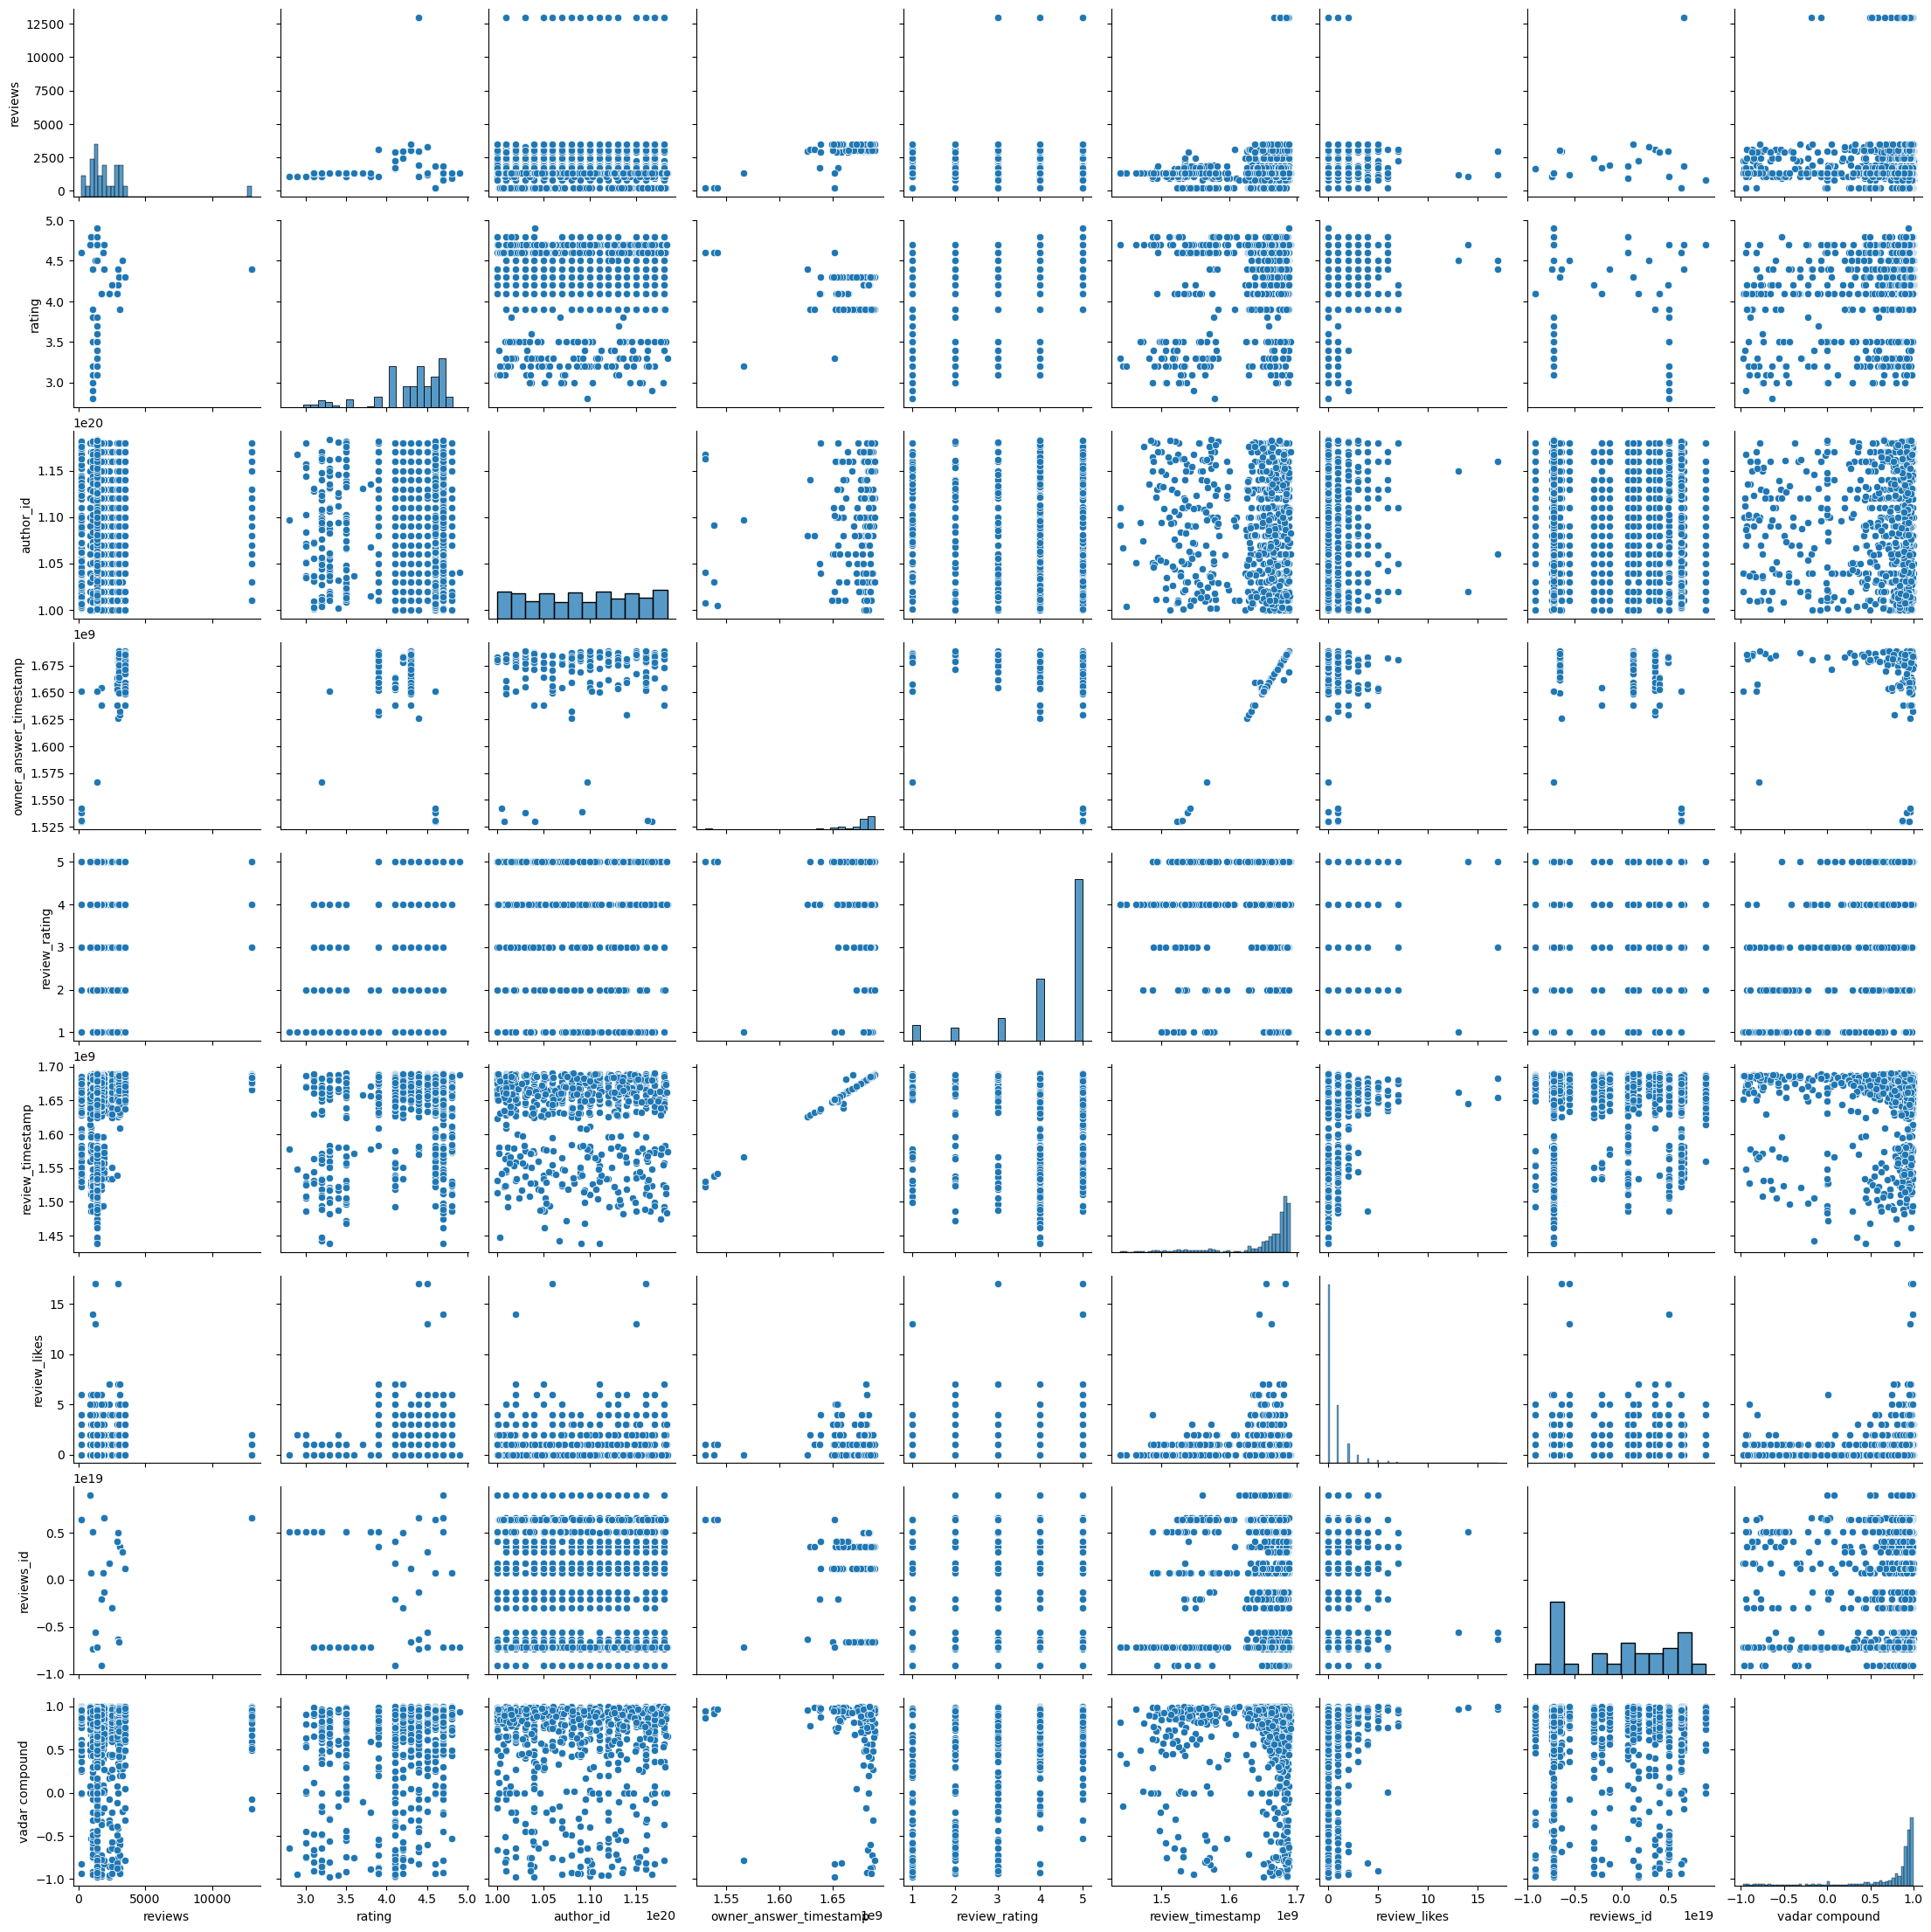

In [50]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.drop(['nr_stopwords','vadar sentiment'],axis=1))
plt.show()

KeyError: 'Column not found: vadar compound'

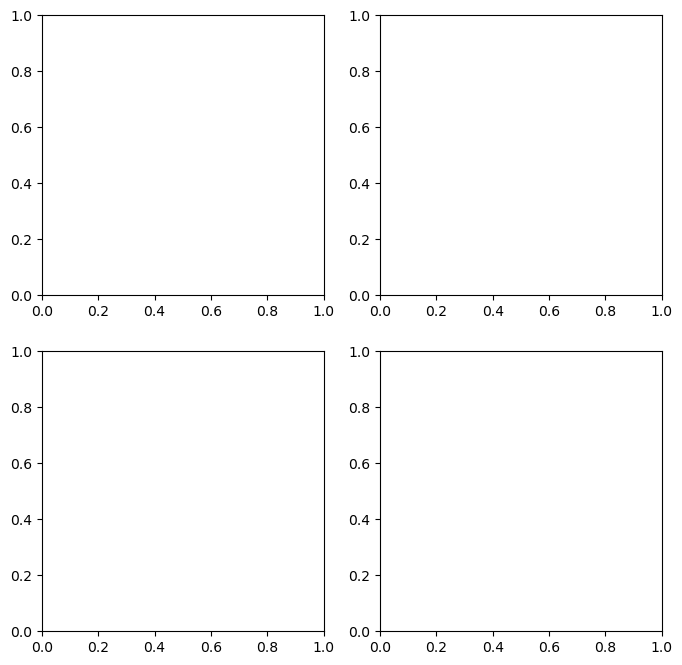

In [5]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 2, figsize=(8, 8))
df.groupby('review_likes')['vadar compound'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][1], fontsize=5, color = '#4285F4')
axarr[0][1].set_title("review likes vs Sentiment", fontsize=10)
df.groupby('check 7')['nr_stopwords'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][0], fontsize=5,color = '#4285F4')
axarr[0][0].set_title("Helpfulness vs Stopwords", fontsize=10)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [6]:
df['review_text'] = df['review_text'].str.lower()# using str.lower to modify to lowercase
df['review_text'].head()

0    this place is absolutely outstanding. it was a...
1    excellent dinner experience in the city center...
2    outstanding from start to finish!\n\nenjoyed a...
3    called in on a saturday without a booking with...
4    we went today for lunch, food was amazing! the...
Name: review_text, dtype: object

In [ ]:
nltk.download('stopwords')

In [7]:
#counting nr. of stopwords per review
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['nr_stopwords'] = df['review_text'].apply(lambda x: len(set(x.split()) & stop_words))

In [8]:
df['nr_stopwords'].describe()#assessing nr. of stopwords in dataset

count    1328.000000
mean       14.998494
std         9.407223
min         0.000000
25%         8.000000
50%        14.000000
75%        20.000000
max        57.000000
Name: nr_stopwords, dtype: float64

In [9]:
import string 
# Storing the sets of punctuation in variable result 
result = string.punctuation 
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
from collections import Counter
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

df['count_punct'] = df.review_text.apply(lambda s: count(s, string.punctuation))
accumulate = lambda l1,l2: [x for x in l1 if x in l2]

df['acc_punct_list'] = df.review_text.apply(lambda s: accumulate(s, string.punctuation))
# accumulate the punctuation marks of each line in a dict and transpose each element into dataframe columns
df['acc_punct_dict'] = df.review_text.apply(lambda s: {k: v for k, v in Counter(s).items() if k in string.punctuation} if any(char in string.punctuation for char in s) else {})

In [11]:
df_punct = df.acc_punct_dict.apply(pd.Series)

In [12]:
df_punct

.    ,    '    (    )    !   :    -   +   ;  ...   %   *   #   ?   ~  \
0     6.0  4.0  1.0  1.0  1.0  NaN NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
1     4.0  NaN  NaN  NaN  NaN  NaN NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
2     6.0  NaN  NaN  1.0  1.0  6.0 NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
3     5.0  NaN  NaN  NaN  NaN  NaN NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
4     1.0  4.0  NaN  1.0  1.0  1.0 NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
...   ...  ...  ...  ...  ...  ...  ..  ...  ..  ..  ...  ..  ..  ..  ..  ..   
1323  3.0  2.0  1.0  NaN  NaN  1.0 NaN  1.0 NaN NaN  ... NaN NaN NaN NaN NaN   
1324  6.0  1.0  1.0  NaN  NaN  NaN NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
1325  6.0  8.0  2.0  NaN  NaN  2.0 NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
1326  2.0  3.0  1.0  NaN  NaN  1.0 NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   
1327  4.0  NaN  NaN  NaN  NaN  4.0 NaN  NaN NaN NaN  ... NaN NaN NaN NaN NaN   

       @   \   $   <   >  
0    NaN NaN NaN NaN NaN  
1    NaN NaN NaN NaN NaN  
2    NaN NaN NaN NaN NaN  
3    NaN NaN NaN NaN NaN  
4    NaN NaN NaN NaN NaN  
...   ..  ..  ..  ..  ..  
1323 NaN NaN NaN NaN NaN  
1324 NaN NaN NaN NaN NaN  
1325 NaN NaN NaN NaN NaN  
1326 NaN NaN NaN NaN NaN  
1327 NaN NaN NaN NaN NaN  

[1328 rows x 23 columns]

In [ ]:
df.head()

In [13]:
df['tokenized_review'] = df.apply(lambda row: nltk.word_tokenize(row['review_text']), axis=1)
df['review_length'] = df.apply(lambda row: len(row['tokenized_review']), axis=1)
df.head()


name                     place_id  reviews  rating  \
0  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
4  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   

      author_id                                        review_text  \
0  1.010000e+20  this place is absolutely outstanding. it was a...   
1  1.110000e+20  excellent dinner experience in the city center...   
2  1.150000e+20  outstanding from start to finish!\n\nenjoyed a...   
3  1.070000e+20  called in on a saturday without a booking with...   
4  1.070000e+20  we went today for lunch, food was amazing! the...   

  owner_answer                                        review_link  \
0          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
1          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
2          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
3          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
4          NaN  https://www.google.com/maps/reviews/data=!4m8!...   

   review_rating  review_likes    reviews_id  nr_stopwords  count_punct  \
0            5.0           0.0 -6.370000e+18            27           13   
1            5.0           1.0 -6.370000e+18            13            4   
2            5.0           1.0 -6.370000e+18            26           14   
3            5.0           0.0 -6.370000e+18            20            5   
4            5.0           0.0 -6.370000e+18            13            8   

                               acc_punct_list  \
0     [., ., ,, ., ,, ., ,, ., ,, ', (, ), .]   
1                                [., ., ., .]   
2  [!, ., ., ., ., (, ), !, !, !, ., ., !, !]   
3                             [., ., ., ., .]   
4                    [,, !, ., (, ), ,, ,, ,]   

                             acc_punct_dict  \
0  {'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}   
1                                  {'.': 4}   
2          {'!': 6, '.': 6, '(': 1, ')': 1}   
3                                  {'.': 5}   
4  {',': 4, '!': 1, '.': 1, '(': 1, ')': 1}   

                                    tokenized_review  review_length  
0  [this, place, is, absolutely, outstanding, ., ...            116  
1  [excellent, dinner, experience, in, the, city,...             52  
2  [outstanding, from, start, to, finish, !, enjo...            134  
3  [called, in, on, a, saturday, without, a, book...             79  
4  [we, went, today, for, lunch, ,, food, was, am...             61

In [ ]:
!python -m spacy download en_core_web_sm -q

In [14]:
df['tokenized_review'].head()

0    [this, place, is, absolutely, outstanding, ., ...
1    [excellent, dinner, experience, in, the, city,...
2    [outstanding, from, start, to, finish, !, enjo...
3    [called, in, on, a, saturday, without, a, book...
4    [we, went, today, for, lunch, ,, food, was, am...
Name: tokenized_review, dtype: object

In [15]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [14]:
df['tokenized_review'].head()

0    [this, place, is, absolutely, outstanding, ., ...
1    [excellent, dinner, experience, in, the, city,...
2    [outstanding, from, start, to, finish, !, enjo...
3    [called, in, on, a, saturday, without, a, book...
4    [we, went, today, for, lunch, ,, food, was, am...
Name: tokenized_review, dtype: object

In [13]:
df['tokenized_review'].astype(str)
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

TypeError: expected string or bytes-like object

In [16]:
import spacy
from spacy import displacy
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#count nr. of adjectives and nouns in review 

In [17]:
df['review_text'].astype(str)
doc = df['review_text'].apply(nlp)#applying spacy and background pipeline will return the objects.

In [18]:
# Function to process each text and extract named entities
def get_named_entities(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply the function to 'review_text' column and store the results in a new column 'named_entities'
df['named_entities'] = df['review_text'].apply(get_named_entities)
#reate a function get_named_entities that processes each text using spaCy and returns a
#list of named entities and their labels. Then, we use the apply method to apply this function 
#to each element in the 'review_text' column and store the results in a new column called 'named_entities'.
#Now, you can access the named entities for each text in the DataFrame.



In [ ]:
print(df['named_entities'].head())

In [19]:
displacy.render(nlp(str(df['named_entities'])), jupyter=True, style='ent')
#generate the raw markup.

In [20]:
displacy.render(nlp(str(df['named_entities'])), style='dep', jupyter = True, options = {'distance': 120})
#Using spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like

In [21]:
# extract part-of-speech and lemmatize
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(df['named_entities'])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('0', 'X', '0'),
 ('                                                     ',
  'SPACE',
  '                                                     '),
 ('[', 'X', '['),
 (']', 'X', ']'),
 ('\n', 'SPACE', '\n'),
 ('1', 'NUM', '1'),
 ('                     ', 'SPACE', '                     '),
 ('[', 'X', '['),
 ('dublin', 'PROPN', 'dublin'),
 ('GPE', 'PROPN', 'GPE'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('\n', 'SPACE', '\n'),
 ('2', 'NUM', '2'),
 ('      ', 'SPACE', '      '),
 ('[', 'X', '['),
 ('3', 'NUM', '3'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('CARDINAL', 'PROPN', 'CARDINAL'),
 ('evening', 'NOUN', 'evening'),
 ('TIME', 'PROPN', 'TIME'),
 ('\n', 'SPACE', '\n'),
 ('3', 'NUM', '3'),
 ('                                     ',
  'SPACE',
  '                                     '),
 ('[', 'X', '['),
 ('saturday', 'PROPN', 'saturday'),
 ('DATE', 'PROPN', 'DATE'),
 ('\n', 'SPACE', '\n'),
 ('4', 'NUM', '4'),
 ('         ', 'SPACE', '         '),
 ('today', 'NOUN', 'today'),
 ('DATE', 'NOUN'

In [22]:
dict([(str(x), x.label_) for x in nlp(str(df['named_entities'])).ents])
#using a list comprehension to extract token information (orthographic 
#representation, part-of-speech tag, and lemma) from a spaCy Doc object
#output is a list of tuples, each containing the orthographic representation,
#part-of-speech tag, and lemma of the tokens

{'dublin': 'GPE',
 'GPE': 'ORG',
 'three': 'CARDINAL',
 'CARDINAL': 'ORG',
 '2       ': 'CARDINAL',
 '3': 'CARDINAL',
 'two': 'CARDINAL',
 'evening': 'TIME',
 'TIME': 'ORG',
 '3                                      ': 'PERCENT',
 'saturday': 'DATE',
 '4          ': 'PERCENT',
 'today': 'DATE',
 'alex': 'PERSON',
 'greece': 'GPE',
 '15': 'CARDINAL',
 'these days': 'DATE',
 '1324': 'DATE',
 'shank': 'ORG',
 'ORG': 'ORG',
 '1327': 'DATE',
 'Length': 'PERSON',
 '1328': 'DATE'}

In [23]:
for entities in df['named_entities']:
    print(entities)

[]
[('dublin', 'GPE'), ('three', 'CARDINAL')]
[('3', 'CARDINAL'), ('two', 'CARDINAL'), ('evening', 'TIME')]
[('saturday', 'DATE')]
[('today', 'DATE'), ('alex', 'PERSON'), ('greece', 'GPE')]
[('the end of the night', 'DATE'), ('two', 'CARDINAL'), ('two', 'CARDINAL')]
[('leonardo bueno', 'PERSON'), ('dessert', 'PERSON'), ('the lemmon sorbet', 'PERSON'), ('irish', 'NORP'), ('about a day', 'DATE'), ('dublin', 'GPE')]
[('this evening', 'TIME'), ('17:30', 'TIME')]
[('dublin', 'GPE'), ('6', 'CARDINAL'), ('saturday', 'DATE'), ('40€', 'QUANTITY'), ('3', 'CARDINAL')]
[('thursday', 'DATE'), ('the day before', 'DATE'), ('3', 'CARDINAL'), ('connemara rock', 'GPE'), ('irish', 'NORP'), ('st.', 'GPE')]
[('dublin', 'GPE'), ('2', 'CARDINAL'), ('60 euro', 'QUANTITY'), ('3', 'CARDINAL'), ('🍞', 'ORG'), ('2', 'CARDINAL'), ('14', 'CARDINAL'), ('💺', 'ORG'), ('2', 'CARDINAL'), ('35 euro', 'QUANTITY'), ('2', 'CARDINAL'), ('40 euro', 'QUANTITY'), ('3', 'CARDINAL'), ('dublin', 'GPE')]
[('monday', 'DATE'), ('first

In [24]:
displacy.render(doc, jupyter=True, style='ent')
#Running this code will display a visual representation
#of the named entities detected in the 'article'. Each entity will be highlighted with its respective entity label. 

In [25]:
#counting details per review, nouns, date, numbers,locations

def count_nouns(review_text):
    doc = nlp(review_text)
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
    return noun_count

# Apply the count_nouns function to the 'text_column' and save the counts to a new column
df['noun_count'] = df['review_text'].apply(count_nouns)

In [30]:
#counting details per review, nouns, date, numbers,locations

def count_percent(review_text):
    doc = nlp(review_text)
    percent_count = sum(1 for token in doc if token.pos_ == "PERCENT")
    return percent_count

# Apply the count_nouns function to the 'text_column' and save the counts to a new column
df['percent_count'] = df['review_text'].apply(count_percent)

In [26]:
def count_date(review_text):
    doc = nlp(review_text)
    date_count = sum(1 for token in doc if token.pos_ == "DATE")
    return date_count
df['date_count'] = df['review_text'].apply(count_date)

In [27]:
def count_ordinal(review_text):
    doc = nlp(review_text)
    ordinal_count = sum(1 for token in doc if token.pos_ == "ORDINAL")
    return ordinal_count
df['ordinal_count'] = df['review_text'].apply(count_ordinal)

In [28]:
def count_location(review_text):
    doc = nlp(review_text)
    location_count = sum(1 for token in doc if token.pos_ == "GPE")
    return location_count
df['location_count'] = df['review_text'].apply(count_location)

In [31]:
# Function to check if the sum of the four columns is less than 10, checking details of review
def check_sum(row):
    return 1 if row['noun_count'] + row['date_count'] + row['ordinal_count'] + row['location_count'] + row['percent_count']  < 10 else 0

# Apply the check_sum function to each row and create the 'new_column'
df['check 7'] = df.apply(check_sum, axis=1)

In [32]:
df.head()

name                     place_id  reviews  rating  \
0  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
4  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   

      author_id                                        review_text  \
0  1.010000e+20  this place is absolutely outstanding. it was a...   
1  1.110000e+20  excellent dinner experience in the city center...   
2  1.150000e+20  outstanding from start to finish!\n\nenjoyed a...   
3  1.070000e+20  called in on a saturday without a booking with...   
4  1.070000e+20  we went today for lunch, food was amazing! the...   

  owner_answer                                        review_link  \
0          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
1          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
2          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
3          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
4          NaN  https://www.google.com/maps/reviews/data=!4m8!...   

   review_rating  review_likes  ...                            acc_punct_dict  \
0            5.0           0.0  ...  {'.': 6, ',': 4, ''': 1, '(': 1, ')': 1}   
1            5.0           1.0  ...                                  {'.': 4}   
2            5.0           1.0  ...          {'!': 6, '.': 6, '(': 1, ')': 1}   
3            5.0           0.0  ...                                  {'.': 5}   
4            5.0           0.0  ...  {',': 4, '!': 1, '.': 1, '(': 1, ')': 1}   

                                    tokenized_review  review_length  \
0  [this, place, is, absolutely, outstanding, ., ...            116   
1  [excellent, dinner, experience, in, the, city,...             52   
2  [outstanding, from, start, to, finish, !, enjo...            134   
3  [called, in, on, a, saturday, without, a, book...             79   
4  [we, went, today, for, lunch, ,, food, was, am...             61   

                                      named_entities noun_count date_count  \
0                                                 []         26          0   
1                 [(dublin, GPE), (three, CARDINAL)]         15          0   
2  [(3, CARDINAL), (two, CARDINAL), (evening, TIME)]         32          0   
3                                 [(saturday, DATE)]         18          0   
4     [(today, DATE), (alex, PERSON), (greece, GPE)]          7          0   

   ordinal_count location_count  percent_count  check 7  
0              0              0              0        0  
1              0              0              0        0  
2              0              0              0        0  
3              0              0              0        0  
4              0              0              0        1  

[5 rows x 24 columns]

In [30]:
df['check 7'].value_counts()

0    738
1    590
Name: check 7, dtype: int64

In [33]:
#removing stopwords for purpose of countvectorizer
df['review_text'].astype(str)
df['review_text'] = df['review_text'].apply(remove_stopwords)

In [34]:
#removing punctuation for purpose of countvectorizer
df['review_text'] = df['review_text'].str.replace('[^\w\s]', '')

In [35]:
#Count how many times each term shows up in each review
def text_vectorizing_process(string):
    return [word for word in string.split()]

In [36]:
#2nd tokenizing-delete previous
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(
    analyzer=text_vectorizing_process,
    ngram_range=(1, 2),
    min_df=0.005,
    max_df=0.9
)
cvec.fit(df['review_text'])

CountVectorizer(analyzer=<function text_vectorizing_process at 0x000001933D1631C0>,
                max_df=0.9, min_df=0.005, ngram_range=(1, 2))

In [37]:
# Get the total n-gram count
len(cvec.vocabulary_)

982

In [38]:
# Creating the bag-of-words representation , Term counts for each review
cvec_counts = cvec.transform(df['review_text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (1328, 982)
nonzero count: 30319
sparsity: 2.32%


In [39]:
# Instantiating the TfidfTransformer
#Calculate the weights for each term in each review
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<1328x982 sparse matrix of type '<class 'numpy.float64'>'
	with 30319 stored elements in Compressed Sparse Row format>

In [40]:

# Convert the transformed weights to a dense numpy array
transformed_weights = transformed_weights.toarray()

# Get the vocabulary (list of n-grams)
vocab = cvec.get_feature_names_out()

# Create a DataFrame with the transformed weights
model = pd.DataFrame(transformed_weights, columns=vocab)

# Add columns for keyword, max weight, and sum of weights
model['Keyword'] = model.idxmax(axis=1)  # Identify the keyword with the highest weight
model['Max'] = model.max(axis=1)  # Maximum weight for each row (document)
model['Sum'] = model.drop(columns=['Max', 'Keyword']).sum(axis=1)  # Sum of weights (excluding max)

# Display the first 10 rows of the DataFrame
print(model.head(10))

     1   10  100  1010   12  125   13        15    2   20  ...  year  years  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
5  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
6  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
7  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.150659  0.0  0.0  ...   0.0    0.0   
8  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.220099  0.0  0.0  ...   0.0    0.0   
9  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   

   yes  yesterday      yet  young  yummy      Keyword       Max       Sum  
0  0.0        0.0  0.00000    0.0    0.0     birthday 

In [41]:
# Merging td-idf weight matrix with original DataFrame data2
#model = pd.merge(cleaned_text, model, left_index=True, right_index=True)
# Check the merged dataset
model.head(10)

1   10  100  1010   12  125   13        15    2   20  ...  year  years  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
5  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
6  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   
7  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.150659  0.0  0.0  ...   0.0    0.0   
8  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.220099  0.0  0.0  ...   0.0    0.0   
9  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...   0.0    0.0   

   yes  yesterday      yet  young  yummy      Keyword       Max       Sum  
0  0.0        0.0  0.00000    0.0    0.0     birthday  0.279358  6.360725  
1  0.0        0.0  0.00000    0.0    0.0       choice  0.409167  4.441548  
2  0.0        0.0  0.00000    0.0    0.0  cauliflower  0.330665  6.825928  
3  0.0        0.0  0.00000    0.0    0.0      terrace  0.272365  4.875809  
4  0.0        0.0  0.00000    0.0    0.0          new  0.512806  4.115328  
5  0.0        0.0  0.17611    0.0    0.0      members  0.352219  6.689238  
6  0.0        0.0  0.00000    0.0    0.0      special  0.279964  5.997393  
7  0.0        0.0  0.00000    0.0    0.0       tables  0.350013  6.892747  
8  0.0        0.0  0.00000    0.0    0.0            s  0.262939  5.320765  
9  0.0        0.0  0.00000    0.0    0.0      oysters  0.265370  7.676702  

[10 rows x 985 columns]

In [42]:
#top 100 frequently occured words in the review
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(10)

Term  Occurrences
340        food         1062
381        good          563
758     service          555
385       great          529
812       staff          439
627       place          417
705  restaurant          347
558        nice          331
972       would          284
221   delicious          278

In [43]:
#Top 10 weighted occured words in the review
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(10)

Term    Weight
340        food  0.062273
381        good  0.048318
385       great  0.046414
758     service  0.041632
812       staff  0.036173
627       place  0.035359
558        nice  0.034009
705  restaurant  0.029075
221   delicious  0.028824
40      amazing  0.027423

In [44]:
df['review_text'] = df['review_text'].astype(str)
#df['review_text'] = df['review_text'].str.lower()

In [45]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['review_text'] = df['review_text'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["review_text"] = df["review_text"].apply(lambda text: lemmatize_words(text))

In [46]:
df['review_text'].head()

0    place absolut outstand birthday dinner boyfrie...
1    excel dinner experi citi center dublin book ad...
2    outstand start finish enjoy wonder even fire s...
3    call saturday without book daughter accommod b...
4    went today lunch food amaz place incred serv r...
Name: review_text, dtype: object

In [ ]:
#df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

<Axes: xlabel='count', ylabel='review_text'>

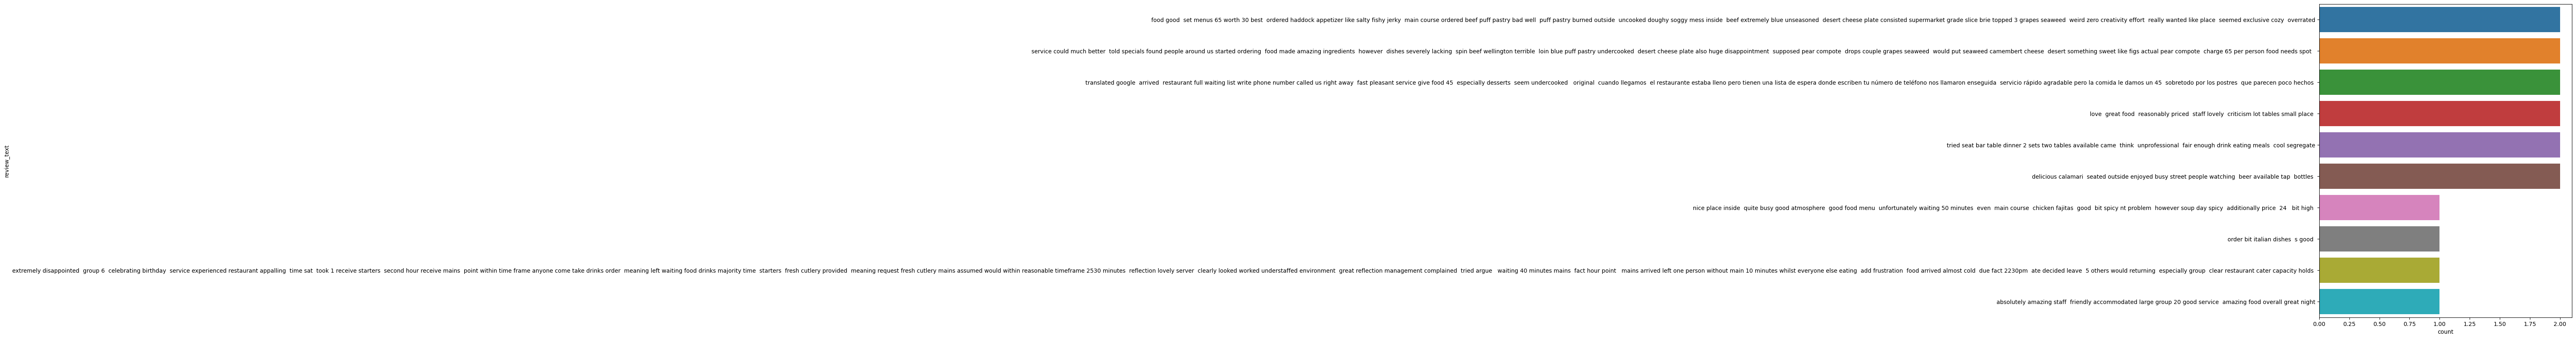

In [54]:
plt.figure(figsize=(8,10))
sns.countplot(y='review_text',data=df,order=df.review_text.value_counts().iloc[:10].index)

In [ ]:
#after removing punction, readding it in as indicator
df['review_text'].replace({'!': ' exclamation ','?': ' question_mark ',
                           '\'' : ' quotation ','\'': 'quotation'},inplace=True)
df['review_text']

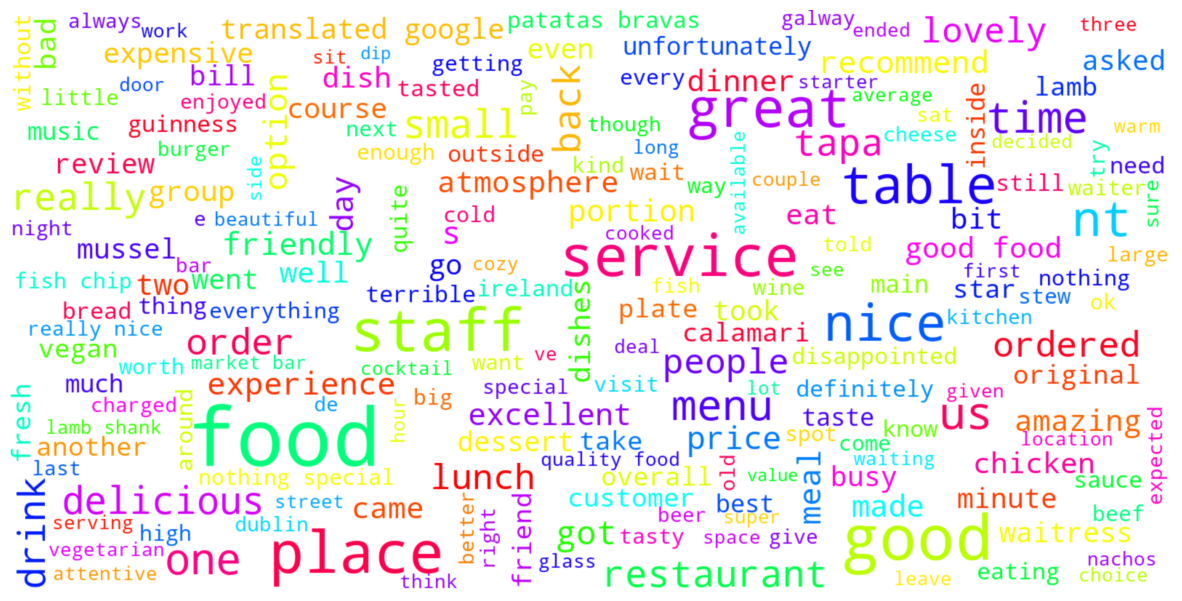

In [65]:

#repeat for positive and negative ratings
consolidated=' '.join(word for word in df['review_text'][df['rating']<4].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, background_color = 'white',colormap = "hsv")
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='gaussian')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('punkt')

In [ ]:
df['review_text'].astype(str)

In [47]:
from collections import Counter

def counter(text):
    cnt=Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

text_cnt=counter(df['review_text'])

In [67]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:
#named entity recognition, system identifies which word is a person’s name, location, etc.
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
#importing chunk library from nltk
#text = reviewText[8]
#token = word_tokenize(text)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
pip install svgling

In [50]:
#pip install pandarallel
import nltk
nltk.download('vader_lexicon')
df['review_text'].astype(str)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0       place absolut outstand birthday dinner boyfrie...
1       excel dinner experi citi center dublin book ad...
2       outstand start finish enjoy wonder even fire s...
3       call saturday without book daughter accommod b...
4       went today lunch food amaz place incred serv r...
                              ...                        
1323    probabl best vegan burger ve ever 15 portion s...
1324    cozi littl restaur realli tasti food dish pret...
1325    cosi intim restaur love staff laid back good s...
1326    mani mussel cheap amaz best ve ireland anywher...
1327    portion huge price good love tomato basil soup...
Name: review_text, Length: 1328, dtype: object

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review_text'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df['vadar sentiment'] = df['vadar compound'].apply(categorise_sentiment)


In [ ]:
df.head()

In [52]:
#generate summary statistics
df[['vadar compound']].describe()

vadar compound
count     1328.000000
mean         0.691818
std          0.366375
min         -0.915300
25%          0.624900
50%          0.840200
75%          0.926000
max          0.997400

In [53]:
#generate summary statistics
df[['vadar sentiment']].value_counts()

vadar sentiment
positive           1208
negative             71
neutral              49
dtype: int64

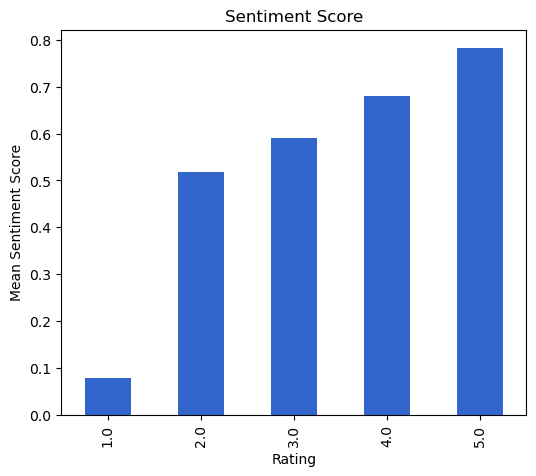

In [54]:
google_colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477",
                 "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc",
                 "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"]

# Set the color palette for Seaborn
sns.set_palette(google_colors)

# Generate mean of sentiment_score by period
dfg = df.groupby('review_rating')['vadar compound'].mean()

# Create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Rating', figsize=(6, 5))
plt.show()

In [55]:
df['vadar sentiment'].value_counts()

positive    1208
negative      71
neutral       49
Name: vadar sentiment, dtype: int64

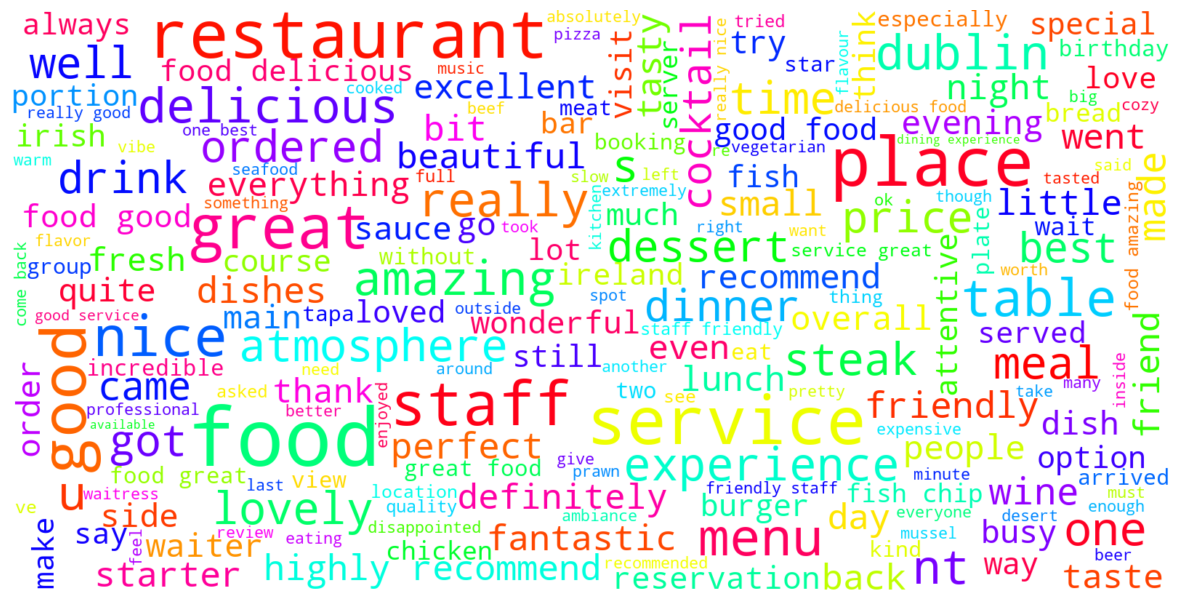

In [80]:
positive_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110,background_color = 'white',colormap = "hsv")
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positive_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

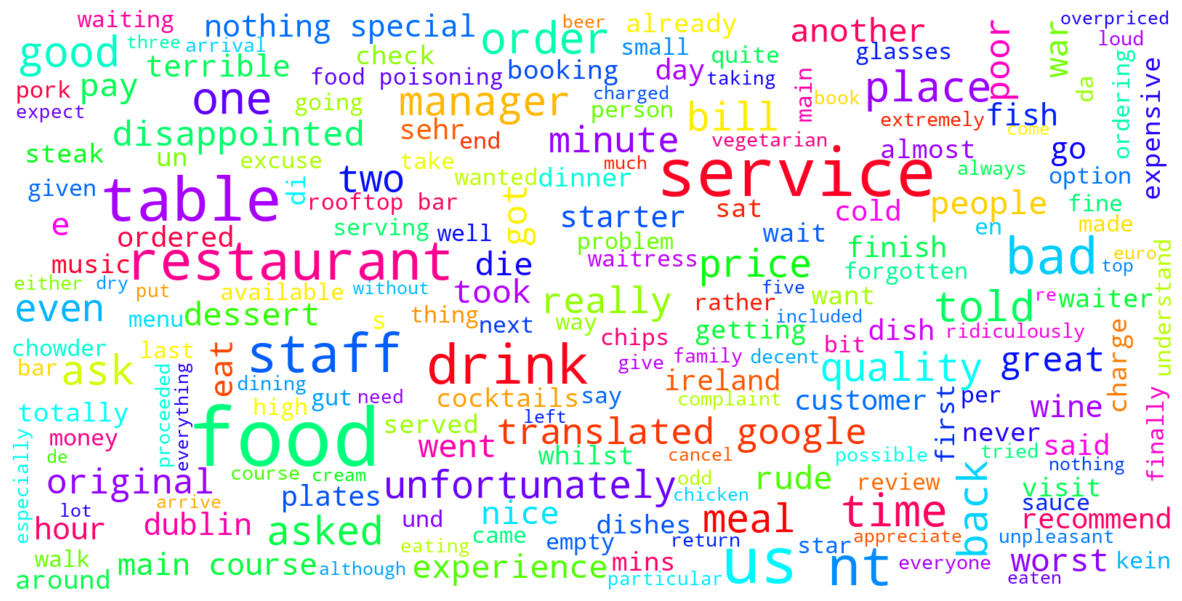

In [82]:
negative_consolidated=' '.join(word for word in df['review_text'][df['vadar sentiment']=='negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, background_color = 'white',colormap = "hsv")
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(negative_consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.head()

In [57]:
# Calculate the count of reviews per author_id
reviews_per_author = df.groupby('author_id')['review_text'].count().reset_index()
reviews_per_author = reviews_per_author.rename(columns={'review_text': 'review_count'})

# Calculate the count of unique names of places reviewed per author_id
places_per_author = df.groupby('author_id')['name'].nunique().reset_index()
places_per_author = places_per_author.rename(columns={'name': 'count_of_places_reviewed'})

# Merge the two dataframes on 'author_id'
new_dataset = pd.merge(reviews_per_author, places_per_author, on='author_id')
#The for loop iterates over the rows of the new_dataset dataframe using the iterrows() method. Inside the loop, we
#compare the 'count of names of places reviewed' with the 'count of reviews' for each row. 
#If the condition row['count of names of places reviewed'] < row['count of reviews'], there maybe be multiple reviews for
#same place
# Add 'check 2' column using if-else statements, check if this person submits>1 review
new_dataset['check 2'] = 0
for index, row in new_dataset.iterrows():
    if row['review_count'] > 1:
        new_dataset.at[index, 'check 2'] = 1 

        #Add 'check 1' column using if-else statements
new_dataset['check 1'] = 0
for index, row in new_dataset.iterrows():
    if row['count_of_places_reviewed'] < row['review_count']:
        new_dataset.at[index, 'check 1'] = 1



        
# Display the resulting dataset
print(new_dataset)

#check 1=1-author has submitted >1 review in dataset
#check2= 1-author has submitted multiple reviews for same place


        author_id  review_count  count_of_places_reviewed  check 2  check 1
0    1.000000e+20            25                        15        1        1
1    1.000530e+20             1                         1        0        0
2    1.001200e+20             1                         1        0        0
3    1.001540e+20             1                         1        0        0
4    1.002100e+20             1                         1        0        0
..            ...           ...                       ...      ...      ...
330  1.181870e+20             1                         1        0        0
331  1.182400e+20             2                         1        1        1
332  1.182760e+20             1                         1        0        0
333  1.182830e+20             1                         1        0        0
334  1.183530e+20             1                         1        0        0

[335 rows x 5 columns]


In [58]:
df = pd.merge(df, new_dataset[['author_id', 'check 1', 'check 2']], on='author_id', how='left')#adding check 1 & 2 back to dataset

In [ ]:
df.head()

In [ ]:
print(df.head())

In [59]:
# Step 1: Calculate the average of 'vadar_compound' per author
average_vadar_compound = df.groupby('author_id')['vadar compound'].mean().reset_index()
average_vadar_compound = average_vadar_compound.rename(columns={'vadar compound': 'avg_vadar_compound'})


In [60]:
average_vadar_compound['avg_vadar_compound'].astype(float)

0      0.730132
1      0.612400
2      0.900100
3     -0.735100
4      0.636900
         ...   
330    0.888500
331    0.789350
332    0.000000
333    0.836000
334    0.807400
Name: avg_vadar_compound, Length: 335, dtype: float64

In [61]:
# Step 1: Calculate the average of 'vadar_compound' per author
#average_vadar_compound = df.groupby('author_id')['vadar compound'].mean().reset_index()
#average_vadar_compound = average_vadar_compound.rename(columns={'vadar compound': 'avg_vadar_compound'})
df = pd.merge(df, average_vadar_compound, on='author_id')
# Step 3: Add 'check 3' column using if-else statements to check if avg_vadar_compound is extreme
df['check 3'] = 0
for index, row in df.iterrows():
    if row['avg_vadar_compound'] <= -0.6 or row['avg_vadar_compound'] >= 0.95:
        df.at[index, 'check 3'] = 1
print(df)

                         name                     place_id  reviews  rating  \
0       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2       FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3                      NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
4                      NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
...                       ...                          ...      ...     ...   
1323  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1324  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1325  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1326  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   
1327  The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365     4.7   

         author_id                                 

In [62]:
df['check 3'].value_counts()

0    1303
1      25
Name: check 3, dtype: int64

In [63]:
#he count_punctuation() function takes a string as input and returns
#the count of punctuation marks using a loop over each punctuation character. Then, we
#use the apply() function to apply this function to each element in the 'text_column' and create a new column 'punctuation_count' containing the results.

def count_punctuation(text):
    return sum(text.count(p) for p in string.punctuation)


# Apply the function to the 'text_column' to count punctuation marks in each element
df['punctuation_count'] = df['review_text'].apply(count_punctuation)
df['punctuation_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: punctuation_count, dtype: int64

In [64]:
df['check 4'] = 0
for index, row in df.iterrows():
    if row['punctuation_count'] >10 :
        df.at[index, 'check 4'] = 1

In [ ]:
df.head()

In [65]:
#check 5 for owner answer
#the condition pd.isna(df['Column1']) | (df['Column1'] == '') checks if 'Column1' is either NaN or an empty string. 
#If it is NaN or an empty string, the corresponding value in 'New_Column' will be 1. Otherwise, it will be 0. 
#The np.where() function efficiently applies this condition and assigns the values to the 'New_Column' in the DataFrame.

#This way, both empty strings and NaN values are considered when creating the 'New_Column'
df['check 5'] = np.where(pd.isna(df['owner_answer']) | (df['owner_answer'] == ''), 1, 0)

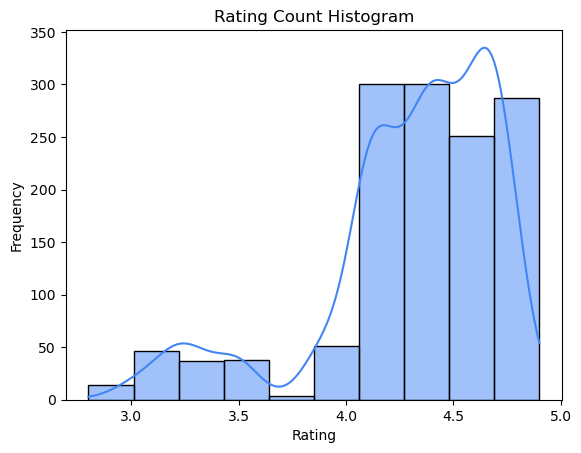

In [66]:

google_blue = "#4285F4"
sns.set_palette([google_blue])

# Create the histogram with Google's classic colors
sns.histplot(data=df, x='rating', kde=True, bins=10)
plt.title('Rating Count Histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [67]:
#check 6, checking review length
# Count the number of characters in 'Column1' and save to 'Character_Count'
df['char_count'] = df['review_text'].str.len()

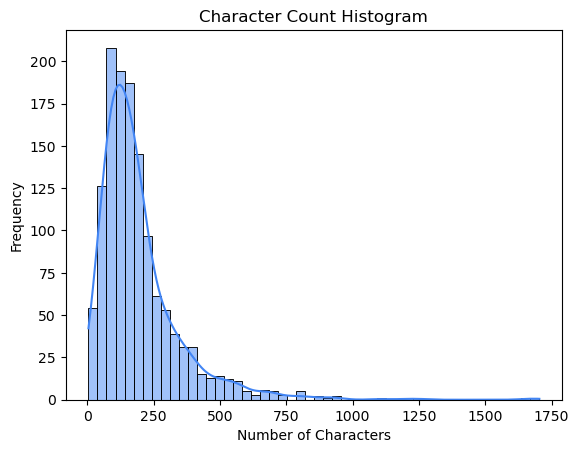

In [68]:
google_colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477",
                 "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc",
                 "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"]

# Set the color palette for Seaborn
google_blue = "#4285F4"
sns.set_palette([google_blue])

# Create the histogram with Google's classic colors
sns.histplot(data=df, x='char_count', kde=True, bins=50)
plt.title('Character Count Histogram')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

In [69]:
#review's length is additionally a significant pointer to
#distinguish spam reviews. At the point when the feedback substance is excessively short, we
#figure the commentator did not consider the item's experience truly

df['char_count'] = df['char_count'].astype(int)

df['check 6'] = 0
for index, row in df.iterrows():
    if row['char_count'] <150 :
        df.at[index, 'check 6'] = 1

In [70]:
df['check 6'].value_counts()

0    703
1    625
Name: check 6, dtype: int64

In [71]:
# Function to check if the sum of the four columns is less than 5, checking details of review
def sum_check(row):
    return 'inauthentic' if row['check 1'] + row['check 2'] + row['check 3'] + row['check 4'] + row['check 5'] + row['check 6'] + row['check 7'] > 4 else 'authentic'

# Apply the sum_check function to each row and create the 'fake' column
df['label'] = df.apply(sum_check, axis=1)

In [72]:
df.head()

name                     place_id  reviews  rating  \
0  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
1  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
2  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951     4.4   
3                 NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   
4                 NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277     4.1   

      author_id                                        review_text  \
0  1.010000e+20  place absolut outstand birthday dinner boyfrie...   
1  1.010000e+20  dine environ friend christma still festiv atmo...   
2  1.010000e+20  went wife s birthday food good enough worth po...   
3  1.010000e+20  great buzz night went reason price club dublin...   
4  1.010000e+20               great time good dinner perfect music   

  owner_answer                                        review_link  \
0          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
1          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
2          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
3          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
4          NaN  https://www.google.com/maps/reviews/data=!4m8!...   

   review_rating  review_likes  ...  check 1  check 2  avg_vadar_compound  \
0            5.0           0.0  ...        1        1            0.721633   
1            4.0           0.0  ...        1        1            0.721633   
2            2.0           2.0  ...        1        1            0.721633   
3            4.0           0.0  ...        1        1            0.721633   
4            5.0           0.0  ...        1        1            0.721633   

  check 3 punctuation_count check 4  check 5 char_count  check 6        label  
0       0                 0       0        1        325        0    authentic  
1       0                 0       0        1        235        0    authentic  
2       0                 0       0        1        115        1  inauthentic  
3       0                 0       0        1        155        0    authentic  
4       0                 0       0        1         36        1  inauthentic  

[5 rows x 36 columns]

In [73]:
df['label'].value_counts()#29 values identified as meeting at least 3 of the 7 criteria (approximatly half)

authentic      1034
inauthentic     294
Name: label, dtype: int64

In [74]:
df.to_csv('export.csv')

In [2]:
df = pd.read_csv('export.csv')

In [11]:
df.head()

Unnamed: 0                   name                     place_id  reviews  \
0           0  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951   
1           1  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951   
2           2  FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951   
3           3                 NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277   
4           4                 NoLIta  ChIJ6Wo3qZ0OZ0gRYgwR_D9RxRg     2277   

   rating     author_id                                        review_text  \
0     4.4  1.010000e+20  place absolut outstand birthday dinner boyfrie...   
1     4.4  1.010000e+20  dine environ friend christma still festiv atmo...   
2     4.4  1.010000e+20  went wife s birthday food good enough worth po...   
3     4.1  1.010000e+20  great buzz night went reason price club dublin...   
4     4.1  1.010000e+20               great time good dinner perfect music   

  owner_answer                                        review_link  \
0          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
1          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
2          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
3          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
4          NaN  https://www.google.com/maps/reviews/data=!4m8!...   

   review_rating  ...  check 1  check 2  avg_vadar_compound  check 3  \
0            5.0  ...        1        1            0.721633        0   
1            4.0  ...        1        1            0.721633        0   
2            2.0  ...        1        1            0.721633        0   
3            4.0  ...        1        1            0.721633        0   
4            5.0  ...        1        1            0.721633        0   

  punctuation_count check 4 check 5  char_count check 6  label  
0                 0       0       1         325       0   true  
1                 0       0       1         235       0   true  
2                 0       0       1         115       1   fake  
3                 0       0       1         155       0   true  
4                 0       0       1          36       1   fake  

[5 rows x 37 columns]

In [ ]:
pip install lazy-text-predict

In [ ]:
pip install classification

In [75]:
from tabulate import tabulate
from lazytextpredict import basic_classification



In [108]:
dataset3=df[['name','rating','author_id','label','review_text']]#subsetting dataset for ML learnin

In [109]:

# Set the seed for reproducibility
np.random.seed(42)

# Get 200 random row indices
random_indices = np.random.choice(dataset3.index, size=100, replace=False)
# Subset the DataFrame using the random indices
subset_df = df.loc[random_indices]
print(subset_df.head())



                                   name                     place_id  reviews  \
1201            The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365   
115                              Mr Fox  ChIJI9ohIoEOZ0gReHRyl3GepHw      845   
979   FX Buckley Steakhouse Crow Street  ChIJcWbtNYMOZ0gRIznsNiJdnFs     1888   
175                              Mr Fox  ChIJI9ohIoEOZ0gReHRyl3GepHw      845   
63                FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951   

      rating     author_id                                        review_text  \
1201     3.5  1.179250e+20  ate stop cliff moher fish chip bread rather ba...   
115      4.7  1.110000e+20  love experi ador almost speakeasi set professi...   
979      4.7  1.100000e+20  amaz meal fiancé birthday staff incred friendl...   
175      4.7  1.150000e+20  word describ impecc experi went extraordinari ...   
63       4.4  1.110000e+20  excel dinner experi citi center dublin book ad...   

     owner_answer         

In [111]:
subset_df.head()

name                     place_id  reviews  \
1201            The Quay Street Kitchen  ChIJq02VIfuWW0gR2jhPDFeIhZw     1365   
115                              Mr Fox  ChIJI9ohIoEOZ0gReHRyl3GepHw      845   
979   FX Buckley Steakhouse Crow Street  ChIJcWbtNYMOZ0gRIznsNiJdnFs     1888   
175                              Mr Fox  ChIJI9ohIoEOZ0gReHRyl3GepHw      845   
63                FIRE Steakhouse & Bar  ChIJl9gur5sOZ0gRdWFOYPXJi6c     2951   

      rating     author_id                                        review_text  \
1201     3.5  1.179250e+20  ate stop cliff moher fish chip bread rather ba...   
115      4.7  1.110000e+20  love experi ador almost speakeasi set professi...   
979      4.7  1.100000e+20  amaz meal fiancé birthday staff incred friendl...   
175      4.7  1.150000e+20  word describ impecc experi went extraordinari ...   
63       4.4  1.110000e+20  excel dinner experi citi center dublin book ad...   

     owner_answer                                        review_link  \
1201          NaN  https://www.google.com/maps/reviews/data=!4m8!...   
115           NaN  https://www.google.com/maps/reviews/data=!4m8!...   
979           NaN  https://www.google.com/maps/reviews/data=!4m8!...   
175           NaN  https://www.google.com/maps/reviews/data=!4m8!...   
63            NaN  https://www.google.com/maps/reviews/data=!4m8!...   

      review_rating  review_likes  ...  check 1  check 2  avg_vadar_compound  \
1201            4.0           0.0  ...        0        0            0.893400   
115             5.0           2.0  ...        1        1            0.700611   
979             5.0           0.0  ...        1        1            0.680450   
175             5.0           0.0  ...        1        1            0.824386   
63              5.0           1.0  ...        1        1            0.700611   

     check 3 punctuation_count check 4  check 5 char_count  check 6  \
1201       0                 0       0        1        225        0   
115        0                 0       0        1        231        0   
979        0                 0       0        1        124        1   
175        0                 0       0        1        215        0   
63         0                 0       0        1        165        0   

            label  
1201    authentic  
115     authentic  
979   inauthentic  
175     authentic  
63      authentic  

[5 rows x 36 columns]

In [100]:
subset_df.shape

(100, 37)

In [ ]:
g

In [99]:
dataset3.head()

name  rating     author_id        label  \
0  FIRE Steakhouse & Bar     4.4  1.010000e+20    authentic   
1  FIRE Steakhouse & Bar     4.4  1.010000e+20    authentic   
2  FIRE Steakhouse & Bar     4.4  1.010000e+20  inauthentic   
3                 NoLIta     4.1  1.010000e+20    authentic   
4                 NoLIta     4.1  1.010000e+20  inauthentic   

                                         review_text  
0  place absolut outstand birthday dinner boyfrie...  
1  dine environ friend christma still festiv atmo...  
2  went wife s birthday food good enough worth po...  
3  great buzz night went reason price club dublin...  
4               great time good dinner perfect music

In [120]:
subset_df['target'] = np.where(subset_df['label']=='inauthentic', 1, 0)
#reate a new column called target to hold our target variable, and we’ll assign 
#the CG fake reviews with 1, and the real or OR reviews with 0.

In [121]:
X = subset_df['review_text']
y = subset_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
#split into the training and test datasets we can use in our machine learning models. We’ll only be using one
#column of data here - the all_text data we preprocessed above. We’re defining the target column to y, so we’ll be training
#our model to predict that class value. We’ll split the data up in the usual manner using train_test_split().

In [118]:
X = subset_df.review_text
Y = subset_df.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

In [119]:
Y

1201    0
115     0
979     0
175     0
63      0
       ..
244     0
23      0
938     0
43      0
243     0
Name: target, Length: 100, dtype: int32

In [19]:
#X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [80]:
trial=basic_classification.LTP(Xdata=X,Ydata=Y, models='all')
trial.run()

converting pandas series to list
converting pandas series to list
X_train length: 90
X_test length: 10
Y_train length: 90
Y_test length: 10
Training on a dataset with 1 labels


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 90
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 30
  Number of trainable parameters = 109483009


KeyboardInterrupt: 

In [ ]:
trial=basic_classification.LTP(Xdata=X,Ydata=Y, csv=None, xlsx=None, x_col='X', y_col='Y', models='all')
trial.run(training_epochs=3)


## Xdata is a list of text entries, and Ydata is a list of corresponding labels.
# csv and xlsx give options to load data from those file formats (you can pass the file or the file's location)
# x_col and y_col are strings that specify the columns of the # text and label columns in your csv or xlsx file respectively.
# You can choose between 'transformers'-based, 'count-vectorizer'-based, and 'all' models.

#Fewer training epochs will give poorer performance, but will run quicker to allow debugging.

In [ ]:
trial.print_metrics_table()
#return the performance of the models that have been trained:https://github.com/lemay-ai/lazyTextPredict
#semi automatic, after fine tuning, find best model for dataset

In [119]:
focused_trial=basic_classification.LTP(test_frac=0.05,train_frac=0.45)
focused_trial.run(focused=True,focused_model='bert-base-uncased',training_epochs=3)

Either you have not put in your own data, or you have only put in X or Y data, loading default dataset...


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


X_train length: 22500
X_test length: 2500
Y_train length: 22500
Y_test length: 2500
Training on a dataset with 2 labels


loading configuration file config.json from cache at C:\Users\quain/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at C:\Users\quain/.cache\huggingface\hub\models--bert-base-uncased\snapshots\1dbc166cf8765166998eff31ade2eb64c8a40076\pytorch_model.bin
Some weights 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

OSError: [WinError 433] A device which does not exist was specified: './results'

In [90]:
dataset3.head()

name  rating     author_id        label  \
0  FIRE Steakhouse & Bar     4.4  1.010000e+20    authentic   
1  FIRE Steakhouse & Bar     4.4  1.010000e+20    authentic   
2  FIRE Steakhouse & Bar     4.4  1.010000e+20  inauthentic   
3                 NoLIta     4.1  1.010000e+20    authentic   
4                 NoLIta     4.1  1.010000e+20  inauthentic   

                                         review_text  
0  place absolut outstand birthday dinner boyfrie...  
1  dine environ friend christma still festiv atmo...  
2  went wife s birthday food good enough worth po...  
3  great buzz night went reason price club dublin...  
4               great time good dinner perfect music

In [114]:
classifiers = {}
classifiers.update({"XGBClassifier": XGBClassifier(eval_metric='logloss',
                                                   objective='binary:logistic',
                                                   )})
classifiers.update({"CatBoostClassifier": CatBoostClassifier(silent=True)})
classifiers.update({"LinearSVC": LinearSVC()})
classifiers.update({"MultinomialNB": MultinomialNB()})
classifiers.update({"LGBMClassifier": LGBMClassifier()})
classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
classifiers.update({"RidgeClassifier": RidgeClassifier()})
classifiers.update({"SGDClassifier": SGDClassifier()})
classifiers.update({"BaggingClassifier": BaggingClassifier()})
classifiers.update({"BernoulliNB": BernoulliNB()})
#create a model selection process that uses scikit-learn pipelines. Firstly, we’ll create a Python dictionary containing 
#the name and command to instantiate each of a range of different classification models, including XGBClassifier, 
#CatBoostClassifier, RandomForestClassifier, DecisionTreeClassifier, MultinomialNB, and many others.

In [107]:
dataframe3_models

Empty DataFrame
Columns: [model, run_time, roc_auc, roc_auc_std]
Index: []

In [106]:
dataframe3_models = pd.DataFrame(columns=['model', 'run_time', 'roc_auc', 'roc_auc_std'])


In [122]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer

dataframe3_models = pd.DataFrame(columns=['model', 'run_time', 'roc_auc', 'roc_auc_std'])

for key in classifiers:
    
    start_time = time.time()
    pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("clf", classifiers[key] )])
    cv = cross_val_score(pipeline, X, y, cv=2, scoring='roc_auc')

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'roc_auc': cv.mean(),
           'roc_auc_std': cv.std(),
    }
    
    dataframe3_models = dataframe3_models.append(row, ignore_index=True)
    
dataframe3_models = dataframe3_models.sort_values(by='roc_auc', ascending=False)
#https://practicaldatascience.co.uk/machine-learning/how-to-build-a-fake-review-detection-model

[LightGBM] [Info] Number of positive: 8, number of negative: 42
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160000 -> initscore=-1.658228
[LightGBM] [Info] Start training from score -1.658228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [125]:
#hyperparameter fine tunining-to test
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'clf__learning_rate': [0.1, 0.01],
    'clf__n_estimators': [50, 300],
    'clf__max_depth': [1, 3, 5, 7],
    'clf__subsample': [0.6, 1.2],
}

# Create a pipeline with TfidfVectorizer and XGBClassifier
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", XGBClassifier(eval_metric='logloss', objective='binary:logistic'))
])

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV to the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding mean CV score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 50, 'clf__subsample': 0.6}
Best ROC AUC Score: 0.6333946078431373


In [126]:
dataframe3_models

model run_time   roc_auc  roc_auc_std
3            MultinomialNB      0.0  0.706845     0.028274
11           SGDClassifier      0.0  0.696429     0.148810
2                LinearSVC      0.0  0.656250     0.049107
8       AdaBoostClassifier     0.01  0.643601     0.008185
10         RidgeClassifier      0.0  0.642857     0.047619
5   RandomForestClassifier     0.01  0.628720     0.042411
6   DecisionTreeClassifier      0.0  0.616071     0.038690
1       CatBoostClassifier     0.29  0.592262     0.056548
12       BaggingClassifier      0.0  0.590774     0.004464
0            XGBClassifier      0.0  0.555804     0.073661
7      ExtraTreeClassifier      0.0  0.528274     0.052083
4           LGBMClassifier     0.01  0.523065     0.027530
9     KNeighborsClassifier     0.01  0.504464     0.081845
13             BernoulliNB      0.0  0.342262     0.104167

In [127]:
bundled_pipeline = Pipeline([("tfidf", TfidfVectorizer()), 
                             ("clf", SGDClassifier())
                            ])
bundled_pipeline.fit(X_train, y_train)
y_pred = bundled_pipeline.predict(X_test)
#may be able to slightly increase performance through hyperparameter tuning

In [128]:
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

In [129]:
print('Accuracy:', accuracy_score)
print('Precision:', precision_score)
print('Recall:', recall_score)
print('ROC/AUC:', roc_auc_score)

Accuracy: 0.8666666666666667
Precision: 0.0
Recall: 0.0
ROC/AUC: 0.5


In [ ]:
df.head()

In [130]:
# use unsupervised learning algorithms to divide the review data into clusters and perform detailed analysis of the clusters to categorize reviews as fake or real.
df1 = df[['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']]
#df1.drop(['columns'], axis=1)
df1.columns=['punctuation_count', 'review_likes', 'rating', 'avg_vadar_compound', 'char_count', 'check 7']

In [144]:
df1.dropna(inplace=True)

In [145]:

from sklearn.cluster import KMeans
inertia = []

#k=7
max_clusters = 7
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(df1[columns])
    inertia.append(kmeans.inertia_)

In [ ]:
df.head()

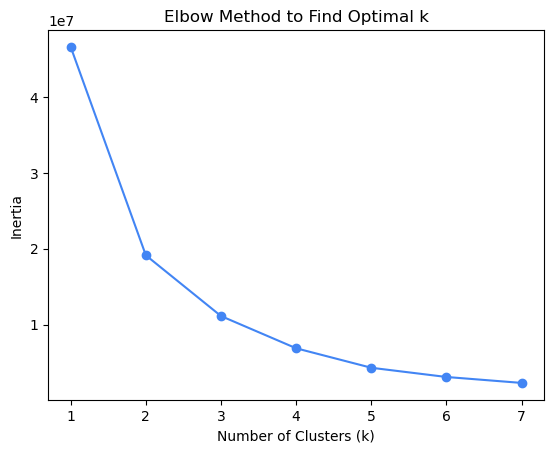

In [146]:

plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()
#The change in inertia becomes less significant from 4 clusters onwards.
#Using the Elbow Technique, we will select the optimal number of clusters to be = 4
#https://github.com/priyalbisht/fake-review-detection/blob/main/Final_FRD.ipynb

In [147]:

X = df1[columns]

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df1['cluster'] = kmeans.fit_predict(X)

In [148]:

df1['cluster']


0       2
1       2
2       0
3       0
4       0
       ..
1323    2
1324    0
1325    2
1326    2
1327    0
Name: cluster, Length: 1327, dtype: int32

In [149]:
df1['cluster'].value_counts()

0    737
2    436
1    138
3     16
Name: cluster, dtype: int64

In [150]:

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
print(cluster_centers)

   punctuation_count  review_likes    rating  avg_vadar_compound   char_count  \
0                0.0      0.443691  4.266621            0.772244   118.289009   
1                0.0      1.101449  4.281884            0.747106   556.652174   
2                0.0      0.814220  4.352294            0.814241   272.928899   
3                0.0      3.187500  4.331250            0.737654  1197.625000   

        check 7  
0  7.611940e-01  
1 -3.885781e-16  
2  6.422018e-02  
3  1.110223e-16  


In [151]:


cluster_analysis = df1.groupby('cluster').mean()
cluster_analysis

punctuation_count  review_likes    rating  avg_vadar_compound  \
cluster                                                                  
0                      0.0      0.443691  4.266621            0.772244   
1                      0.0      1.101449  4.281884            0.747106   
2                      0.0      0.814220  4.352294            0.814241   
3                      0.0      3.187500  4.331250            0.737654   

          char_count   check 7  
cluster                         
0         118.289009  0.761194  
1         556.652174  0.000000  
2         272.928899  0.064220  
3        1197.625000  0.000000

In [152]:
cluster_temp = cluster_analysis
cluster_temp['cluster_index'] = range(cluster_temp.shape[0])

In [ ]:
cluster_temp

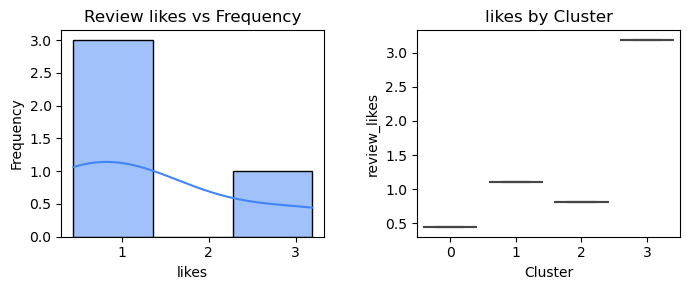

In [153]:

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['review_likes'], kde=True)
plt.title('Review likes vs Frequency')
plt.xlabel('likes')
plt.ylabel('Frequency')

numerical_column = 'review_likes'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'likes by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#most reviews (70%) have les than 0.2 likes, while approx 30% have between 0.5 and 0.65 likes, cluster 0 has more likes
#, compared to other clusters, extreme values, largeely differeing from other clusters. Likes is another flag for 
#inauthenticy

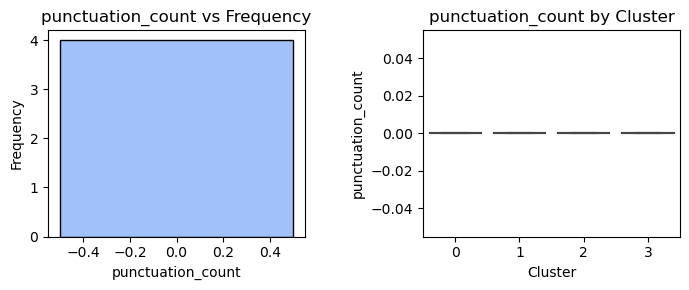

In [154]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['punctuation_count'], kde=True)
plt.title('punctuation_count vs Frequency')
plt.xlabel('punctuation_count')
plt.ylabel('Frequency')

numerical_column = 'punctuation_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'punctuation_count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#punctuation count equally split. 50% of review have between 0-6 punctuation counts per review
#the other 50% have between 10 and 12 per review
#cluster 0 and cluster 2 have less punctuation compared to 1 and 3, which is another flag for inauthenticity

In [ ]:

cluster_analysis['punctuation_count']

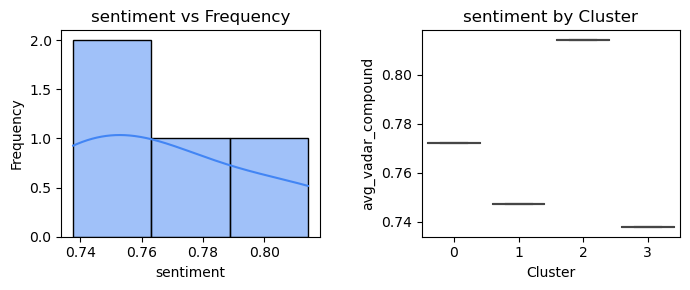

In [155]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['avg_vadar_compound'], kde=True)
plt.title('sentiment vs Frequency')
plt.xlabel('sentiment')
plt.ylabel('Frequency')

numerical_column = 'avg_vadar_compound'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'sentiment by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#no change in sentiment between clusters

In [ ]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['check 7'], kde=True)
plt.title('detail vs Frequency')
plt.xlabel('nr. of detailst')
plt.ylabel('Frequency')

numerical_column = 'check 7'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'details by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#cluster 0 and 3 contain most details, ie. nouns, dates, names, times. cluster 1 and 3 containing less

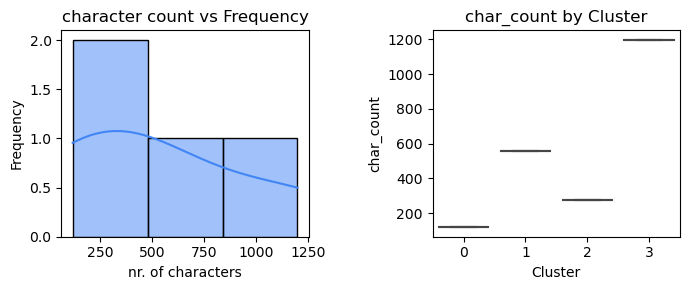

In [156]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.histplot(cluster_analysis['char_count'], kde=True)
plt.title('character count vs Frequency')
plt.xlabel('nr. of characters')
plt.ylabel('Frequency')

numerical_column = 'char_count'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_index', y=numerical_column, data=cluster_temp)
plt.title(f'char_count by Cluster')
plt.xlabel('Cluster')
plt.ylabel(numerical_column)
plt.tight_layout(w_pad=3)

plt.show()
#again 1 and 3 standing out as high character count which is a sign of inauthenticity

In [ ]:

cluster_counts = cluster_temp['cluster_index'].value_counts()
total_reviews_in_cluster = cluster_counts.sum()
percentage_cluster_1 = (cluster_counts[1] / total_reviews_in_cluster) * 100
percentage_cluster_1
#cluster' - clusters of reviews based on review data.

In [ ]:
df1[df1['cluster']==3]['rating'].value_counts()

In [ ]:
df1[df1['cluster']==1]['rating'].value_counts()
    #deduced cluster 1 and 3 contain some extreme values which are flagged for inauthenticity 
    #but rating level is not different to other clusters

In [ ]:
df1[df1['cluster']==2]['rating'].value_counts()

In [ ]:
cluster_analysis[['punctuation_count','review_likes',
                  'rating','avg_vadar_compound',
                  'char_count','check 7']]

In [ ]:
#on basis of analysis from pipeline of k means clustering, 
#clusters 1 and 3 have high punctuation counts
#cluster - has high amount of likes
#1 and 3 have low level of detail
#cluster 0 and 2 have low character count
#3 has a high character count but low level of detail
#sentimt is equal across the board